In [2]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2

from ChessReD_Dataset import ChessReDDataset

In [3]:
dataset = ChessReDDataset(label_key='corners')
dataloader = dataset.getLoader()
len(dataset)

2078

In [4]:
# replace with method being tested
def extractCorners(img: torch.Tensor) -> torch.Tensor: # [4,2]
    return torch.rand(4,2, dtype=torch.float32) * 3024

In [5]:
def get_mask(corners: torch.Tensor, size: tuple[int, int]) -> torch.Tensor:
    mask = np.zeros(size)
    mask = cv2.fillPoly(mask, [corners.numpy().astype(np.int32)], 1)
    return torch.tensor(mask, dtype=torch.float32)

In [6]:
def get_acc(corners_prime: torch.Tensor, corners: torch.Tensor, img_shape: tuple[int, int]) -> float:
    # IOU
    mask_prime = get_mask(corners_prime, img_shape)
    mask = get_mask(corners, img_shape)
    intersection = torch.sum(mask * mask_prime)
    union = torch.sum((mask + mask_prime) > 0)
    return (intersection / union).item()

In [7]:
def plot_acc(img, y_prime, y):
    mask = get_mask(y, img.shape[:2])
    mask_prime = get_mask(y_prime, img.shape[:2])
    plt.imshow(img, cmap='gray');
    plt.imshow(mask, alpha=mask*.5, cmap='Blues');
    plt.imshow(mask_prime, alpha=mask_prime*.5, cmap='Reds');

    acc = get_acc(y_prime, y, img.shape)
    return acc

0.9879509806632996

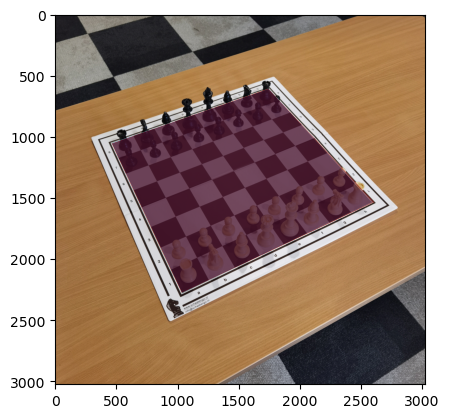

In [ ]:
# Github Saddle Points

img, _ = dataset[0]

y_prime = [[ 76.59788,  175.24043 ],
            [171.17491,  376.66028 ],
            [431.50546,  254.27939 ],
            [288.10693,  100.996765]]
y_prime = torch.tensor(y_prime) / 500 * 3024

y = torch.tensor([
        [464, 1055],
        [1747, 613],
        [2586, 1537],
        [1039, 2279],
    ], dtype=torch.float32)

# --------------------------------------

plot_acc(img, y_prime, y)

0.971210241317749

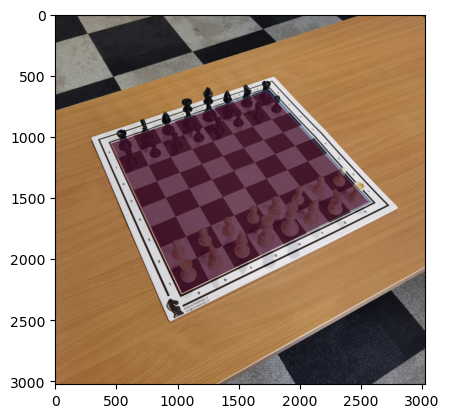

In [21]:
# YOLO + Lines

img, _ = dataset[0]

y_prime = torch.tensor([
    [ 451.5206, 1060.3992],
    [1735.2749,  632.3293],
    [2563.6028, 1536.3629],
    [1035.8461, 2289.6538]
], dtype=torch.float32)

y = torch.tensor([
        [464, 1055],
        [1747, 613],
        [2586, 1537],
        [1039, 2279],
    ], dtype=torch.float32)

# --------------------------------------

plot_acc(img, y_prime, y)

0.9919146299362183

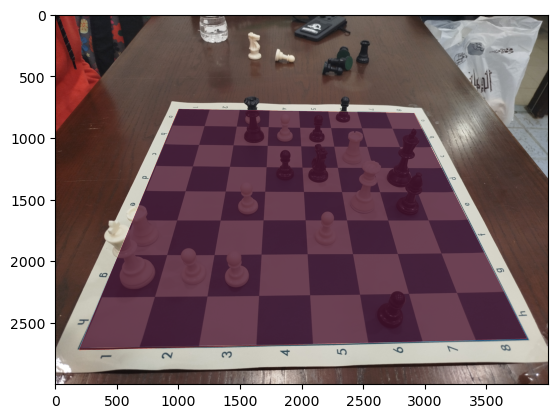

In [ ]:
# Github Saddle Points

img = torch.tensor(plt.imread("../data/data_manual/1741715439429.jpg"))

y_prime = torch.tensor([
    [ 24.235247, 340.87555 ],
    [478.92075,  329.0518  ],
    [364.30496,  100.23419 ],
    [125.05397,   96.17047 ],
    [ 24.235247, 340.87555 ]
], dtype=torch.float32) / 500 * 4000

y = torch.tensor([
    [1006,769],
    [2911, 803],
    [3843,2642],
    [197,2707]
])

plot_acc(img, y_prime, y)

torch.Size([3000, 4000, 3])


0.9613792300224304

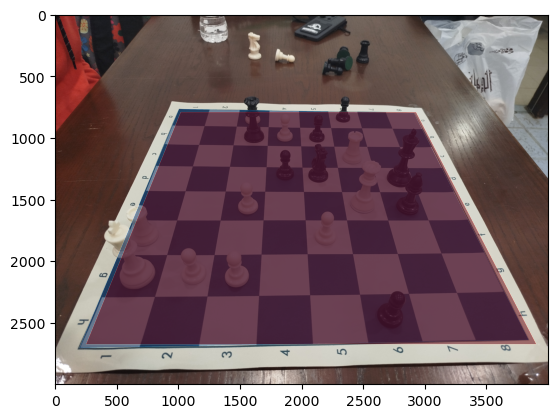

In [16]:
# YOLO + Lines

img = torch.tensor(plt.imread("../data/data_manual/1741715439429.jpg"))
print(img.shape)

y_prime = torch.tensor([
    [1020.5584,  795.4557],
    [2929.8320,  795.4557],
    [3905.3201, 2677.6138],
    [ 252.8955, 2677.6130]
], dtype=torch.float32)

y = torch.tensor([
    [1006,769],
    [2911, 803],
    [3843,2642],
    [197,2707]
])

plot_acc(img, y_prime, y)